## Analyzing the Air bnb datasets for Boston

### Part of the first project for DataScience Nanodegree from Udacity

### Data Scientist: Rafael Mata M.

### Date Created: 15 October 2020
### Last updated: 31 October 2020

#### Import the libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn import preprocessing

# if needed download stopwords and punkt

import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

%matplotlib inline

### Read the datasets

In [5]:
boston_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Boston/'
seattle_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Seattle/'

#### Boston Datasets

In [6]:
boston_df_listings = pd.read_csv(boston_dir+'listings.csv')
boston_df_calendar = pd.read_csv(boston_dir+'calendar.csv')
boston_df_reviews = pd.read_csv(boston_dir+'reviews.csv')
print('Boston datasets read...')

Boston datasets read...


## DATA UNDERSTANDING

There is three datasets:
    
- listings: contains the list of airbnb's houses in the Boston and Seattle area
- calendar: the availabily of houses
- reviews: Reviews for the houses

The datasets can be found here

#### Datasets shapes

In [7]:
print('BOSTON datasets Shape')
print('Listings dataset: {}'.format(boston_df_listings.shape))
print('Calendar dataset: {}'.format(boston_df_calendar.shape))
print('Reviews dataset: {}'.format(boston_df_reviews.shape))

BOSTON datasets Shape
Listings dataset: (3585, 95)
Calendar dataset: (1308890, 4)
Reviews dataset: (68275, 6)


In [8]:
boston_df_reviews.head(5)

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

In [9]:
boston_df_calendar.head(5)

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 20)
boston_df_listings.head(5)

id          listing_url       scrape_id last_scraped  \
0  12147973  https://www.airb...  20160906204935   2016-09-07   
1   3075044  https://www.airb...  20160906204935   2016-09-07   
2      6976  https://www.airb...  20160906204935   2016-09-07   
3   1436513  https://www.airb...  20160906204935   2016-09-07   
4   7651065  https://www.airb...  20160906204935   2016-09-07   

                  name              summary                space  \
0  Sunny Bungalow i...  Cozy, sunny, fam...  The house has an...   
1  Charming room in...  Charming and qui...  Small but cozy a...   
2  Mexican Folk Art...  Come stay with a...  Come stay with a...   
3  Spacious Sunny B...  Come experience ...  Most places you ...   
4  Come Home to Boston  My comfy, clean ...  Clean, attractiv...   

           description experiences_offered neighborhood_overview  \
0  Cozy, sunny, fam...                none  Roslindale is qu...    
1  Charming and qui...                none  The room is in R...    
2  Come stay with a...                none  The LOCATION: Ro...    
3  Come experience ...                none  Roslindale is a ...    
4  My comfy, clean ...                none  I love the proxi...    

                 notes              transit               access  \
0                  NaN  The bus stop is ...  You will have ac...   
1  If you don't hav...  Plenty of safe s...  Apt has one more...   
2  I am in a scenic...  PUBLIC TRANSPORT...  I am living in t...   
3  Please be mindfu...  There are buses ...  The basement has...   
4  I have one roomm...  From Logan Airpo...  You will have ac...   

           interaction          house_rules        thumbnail_url  \
0                  NaN  Clean up and tre...  https://a2.musca...   
1  If I am at home,...  Pet friendly but...  https://a1.musca...   
2  ABOUT ME: I'm a ...  I encourage you ...  https://a2.musca...   
3  We do live in th...  - The bathroom a...  https://a2.musca...   
4  I love my city a...  Please no smokin...  https://a1.musca...   

            medium_url          picture_url       xl_picture_url   host_id  \
0  https://a2.musca...  https://a2.musca...  https://a2.musca...  31303940   
1  https://a1.musca...  https://a1.musca...  https://a1.musca...   2572247   
2  https://a2.musca...  https://a2.musca...  https://a2.musca...     16701   
3  https://a2.musca...  https://a2.musca...  https://a2.musca...   6031442   
4  https://a1.musca...  https://a1.musca...  https://a1.musca...  15396970   

              host_url host_name  host_since        host_location  \
0  https://www.airb...  Virginia  2015-04-15  Boston, Massachu...   
1  https://www.airb...    Andrea  2012-06-07  Boston, Massachu...   
2  https://www.airb...      Phil  2009-05-11  Boston, Massachu...   
3  https://www.airb...    Meghna  2013-04-21  Boston, Massachu...   
4  https://www.airb...     Linda  2014-05-11  Boston, Massachu...   

            host_about  host_response_time host_response_rate  \
0  We are country a...                 NaN                NaN   
1  I live in Boston...      within an hour               100%   
2  I am a middle-ag...  within a few hours               100%   
3  My husband and I...  within a few hours               100%   
4  I work full time...      within an hour               100%   

  host_acceptance_rate host_is_superhost   host_thumbnail_url  \
0                  NaN                 f  https://a2.musca...   
1                 100%                 f  https://a2.musca...   
2                  88%                 t  https://a2.musca...   
3                  50%                 f  https://a2.musca...   
4                 100%                 t  https://a0.musca...   

      host_picture_url host_neighbourhood  host_listings_count  \
0  https://a2.musca...         Roslindale                    1   
1  https://a2.musca...         Roslindale                    1   
2  https://a2.musca...         Roslindale                    1   
3  https://a2.musca...                NaN           

### Select the features from listings that are  going to be considered in the analysis

In [11]:
listings_features = ['id', 'neighborhood_overview', 'transit', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_is_superhost',
       'availability_30', 'availability_60', 'availability_90', 'availability_365',
                     'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 
                     'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','price', 'guests_included', 
                     'extra_people', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                     'cancellation_policy', 'reviews_per_month']

In [12]:
boston_df2_listings = boston_df_listings[listings_features].copy()


#### Nan values in the datasets

In [13]:
boston_nulls_listings = boston_df2_listings.isnull().sum()/boston_df_listings.shape[0]*100
boston_nulls_calendar = boston_df_calendar.isnull().sum()/boston_df_calendar.shape[0]*100
boston_nulls_reviews  = boston_df_reviews.isnull().sum()/boston_df_reviews.shape[0]*100


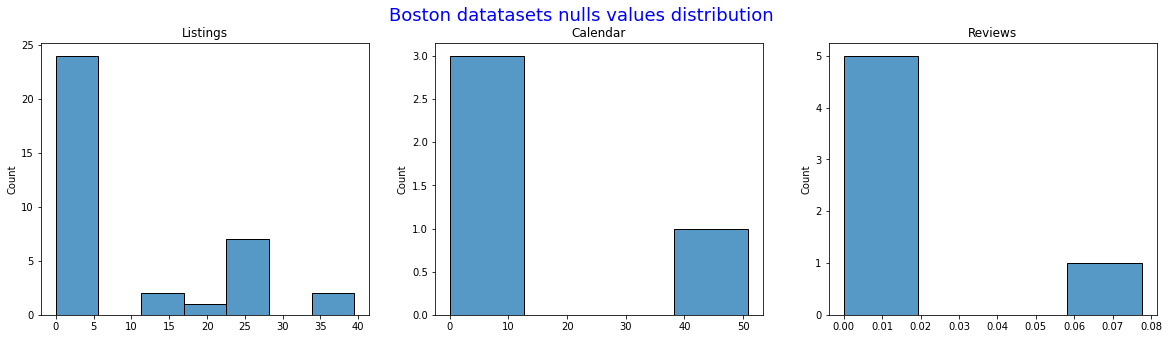

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Boston datatasets nulls values distribution', fontsize=18, c='b')
#boston_nulls_listings.hist(ax=ax[0])
sns.histplot(data=boston_nulls_listings,x=boston_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=boston_nulls_calendar,x=boston_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=boston_nulls_reviews,x=boston_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

### It looks that  the Listings datasets have the more columns with Nan values below will be process this Nan values

#### Columns with more than 20% Nan Values

In [15]:
print('BOSTON')
print('Listings dataset columns with more than 20% Nan values')
boston_df2_listings.columns[boston_nulls_listings >= 20]

BOSTON
Listings dataset columns with more than 20% Nan values


Index(['neighborhood_overview', 'transit', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

## Data Cleaning and preprocessing

### Convert date columns to year, month, week, dayofWeek

In [16]:
boston_df_calendar['month'] = pd.to_datetime(boston_df_calendar['date']).dt.month
boston_df_calendar['year'] = pd.to_datetime(boston_df_calendar['date']).dt.year
boston_df_calendar['dayofweek'] = pd.to_datetime(boston_df_calendar['date']).dt.dayofweek


In [17]:
boston_df_reviews['month'] = pd.to_datetime(boston_df_reviews['date']).dt.month
boston_df_reviews['year'] = pd.to_datetime(boston_df_reviews['date']).dt.year
boston_df_reviews['dayofweek'] = pd.to_datetime(boston_df_reviews['date']).dt.dayofweek

### Using the NLTK library, preprocessing the text columns to extract some features to include in the model

Based on [this](https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7) article from **medium** to use the NLTK

In [18]:
# Function to preprocess the text columns a eliminate word stoppers and puntuantion 

import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

stop_words = set(stopwords.words('english'))

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [19]:
# Copy the text columns to analyze into a new dataframe


df = boston_df2_listings[['neighborhood_overview','transit','amenities']].copy()

## Convert to string this columns 
df['transit_str'] = df['transit'].astype(str)
df['amenities_str'] = df['amenities'].astype(str)
df['neighborhood_str'] = df['neighborhood_overview'].astype(str)

# Convert to tokens the columns

df['amenities_token'] = df['amenities_str'].apply(preprocess)
df['neighborhood_token'] = df['neighborhood_str'].apply(preprocess)
df['transit_token'] = df['transit_str'].apply(preprocess)



In [20]:
# Most commong words
print('Most amenities column common words')
from collections import Counter
Counter(" ".join(df["amenities_token"]).split()).most_common(10)


Most amenities column common words


[('internet', 5998),
 ('detector', 5353),
 ('tv', 4377),
 ('dryer', 4289),
 ('wireless', 4260),
 ('friendli', 3722),
 ('heat', 3384),
 ('kitchen', 3284),
 ('smoke', 3006),
 ('essenti', 2994)]

In [21]:
# Most commong words
print('Most transit column common words')
from collections import Counter
Counter(" ".join(df["transit_token"]).split()).most_common(10)

Most transit column common words


[('walk', 2416),
 ('minut', 2382),
 ('line', 2240),
 ('boston', 1766),
 ('station', 1691),
 ('nan', 1290),
 ('park', 1254),
 ('bu', 1191),
 ('stop', 1142),
 ('street', 1053)]

In [22]:
# Most commong words
print('Most neighborhood column common words')
from collections import Counter
Counter(" ".join(df["neighborhood_token"]).split()).most_common(10)

Most neighborhood column common words


[('boston', 2575),
 ('walk', 1593),
 ('neighborhood', 1544),
 ('restaur', 1471),
 ('nan', 1415),
 ('street', 1013),
 ('shop', 916),
 ('park', 896),
 ('locat', 778),
 ('minut', 765)]

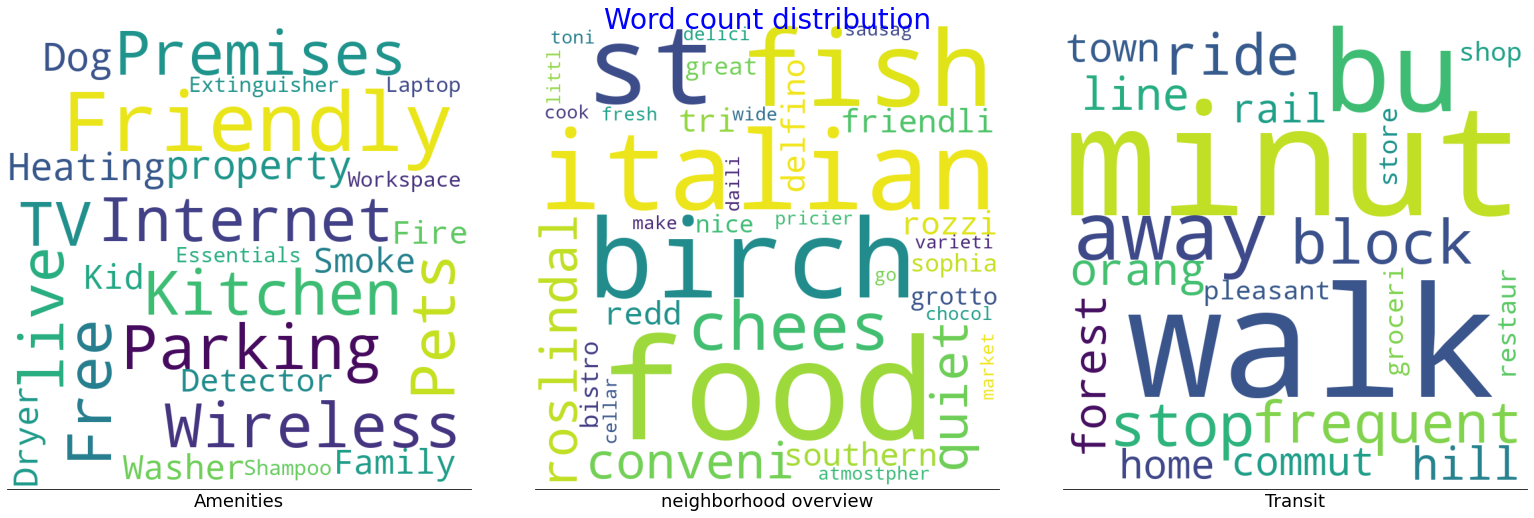

In [23]:
def word_cloud(column):

    all_words = '' 

    for arg in column: 
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
        wordcloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 8).generate(all_words) 
        
        return all_words, wordcloud
  
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(22,7)) 
fig.suptitle('Word count distribution', fontsize=28, c='b')                        

amenities_aw, amenities_wc =  word_cloud(df['amenities']) 
neighbor_aw, neighbor_wc =  word_cloud(df['neighborhood_token'])
transit_aw, transit_wc =  word_cloud(df['transit_token'])

ax[0].imshow(amenities_wc) 
#ax[0].axis("off")
ax[0].get_yaxis().set_ticks([])
ax[0].get_xaxis().set_ticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Amenities',fontsize=18)
ax[1].imshow(neighbor_wc) 
ax[1].get_yaxis().set_ticks([])
ax[1].get_xaxis().set_ticks([])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel('neighborhood overview',fontsize=18) 
ax[2].imshow(transit_wc) 
ax[2].get_yaxis().set_ticks([])
ax[2].get_xaxis().set_ticks([])
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].set_xlabel('Transit',fontsize=18) 
plt.tight_layout(pad = 0)

In [24]:
from nltk.util import ngrams
n_gram = 5
n_gram_dic = dict(Counter(ngrams(neighbor_aw.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 1:
        print(i, n_gram_dic[i])

('roslindal', 'quiet', 'conveni', 'friendli', 'southern') 1
('quiet', 'conveni', 'friendli', 'southern', 'food') 1
('conveni', 'friendli', 'southern', 'food', 'tri') 1
('friendli', 'southern', 'food', 'tri', 'redd') 1
('southern', 'food', 'tri', 'redd', 'rozzi') 1
('food', 'tri', 'redd', 'rozzi', 'italian') 1
('tri', 'redd', 'rozzi', 'italian', 'delfino') 1
('redd', 'rozzi', 'italian', 'delfino', 'sophia') 1
('rozzi', 'italian', 'delfino', 'sophia', 'grotto') 1
('italian', 'delfino', 'sophia', 'grotto', 'great') 1
('delfino', 'sophia', 'grotto', 'great', 'birch') 1
('sophia', 'grotto', 'great', 'birch', 'st') 1
('grotto', 'great', 'birch', 'st', 'bistro') 1
('great', 'birch', 'st', 'bistro', 'nice') 1
('birch', 'st', 'bistro', 'nice', 'atmostpher') 1
('st', 'bistro', 'nice', 'atmostpher', 'littl') 1
('bistro', 'nice', 'atmostpher', 'littl', 'pricier') 1
('nice', 'atmostpher', 'littl', 'pricier', 'cook') 1
('atmostpher', 'littl', 'pricier', 'cook', 'fish') 1
('littl', 'pricier', 'cook',

In [25]:
from nltk.util import ngrams
n_gram = 4
n_gram_dic = dict(Counter(ngrams(transit_aw.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 1:
        print(i, n_gram_dic[i])

('bu', 'stop', 'block', 'away') 1
('stop', 'block', 'away', 'frequent') 1
('block', 'away', 'frequent', 'bu') 1
('away', 'frequent', 'bu', 'minut') 1
('frequent', 'bu', 'minut', 'ride') 1
('bu', 'minut', 'ride', 'orang') 1
('minut', 'ride', 'orang', 'line') 1
('ride', 'orang', 'line', 'forest') 1
('orang', 'line', 'forest', 'hill') 1
('line', 'forest', 'hill', 'commut') 1
('forest', 'hill', 'commut', 'rail') 1
('hill', 'commut', 'rail', 'town') 1
('commut', 'rail', 'town', 'minut') 1
('rail', 'town', 'minut', 'walk') 1
('town', 'minut', 'walk', 'home') 1
('minut', 'walk', 'home', 'walk') 1
('walk', 'home', 'walk', 'pleasant') 1
('home', 'walk', 'pleasant', 'restaur') 1
('walk', 'pleasant', 'restaur', 'shop') 1
('pleasant', 'restaur', 'shop', 'groceri') 1
('restaur', 'shop', 'groceri', 'store') 1
('shop', 'groceri', 'store', 'minut') 1
('groceri', 'store', 'minut', 'walk') 1
('store', 'minut', 'walk', 'away') 1


In [26]:
from nltk.util import ngrams
n_gram = 4
n_gram_dic = dict(Counter(ngrams(amenities_aw.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 1:
        print(i, n_gram_dic[i])

('{TV,"Wireless', 'Internet",Kitchen,"Free', 'Parking', 'on') 1
('Internet",Kitchen,"Free', 'Parking', 'on', 'Premises","Pets') 1
('Parking', 'on', 'Premises","Pets', 'live') 1
('on', 'Premises","Pets', 'live', 'on') 1
('Premises","Pets', 'live', 'on', 'this') 1
('live', 'on', 'this', 'property",Dog(s),Heating,"Family/Kid') 1
('on', 'this', 'property",Dog(s),Heating,"Family/Kid', 'Friendly",Washer,Dryer,"Smoke') 1
('this', 'property",Dog(s),Heating,"Family/Kid', 'Friendly",Washer,Dryer,"Smoke', 'Detector","Fire') 1
('property",Dog(s),Heating,"Family/Kid', 'Friendly",Washer,Dryer,"Smoke', 'Detector","Fire', 'Extinguisher",Essentials,Shampoo,"Laptop') 1
('Friendly",Washer,Dryer,"Smoke', 'Detector","Fire', 'Extinguisher",Essentials,Shampoo,"Laptop', 'Friendly') 1
('Detector","Fire', 'Extinguisher",Essentials,Shampoo,"Laptop', 'Friendly', 'Workspace"}') 1


### Using the word analysis convert the categorical variables

### Encode the amenities columns to numerical columns

In [27]:
amenities   = df.amenities.str.replace("[{}]", "")
amenity_hot_encoder = amenities.str.get_dummies(sep = ",")

In [28]:
df['bus-stop'] = 0
df.loc[df['transit_token'].str.contains('bu'),'bus-stop'] = 1

In [29]:
df['restaurants-near'] = 0
df['downtown-near'] = 0
df['park-near'] = 0

In [30]:
df.loc[df['neighborhood_token'].str.contains('restau'),'restaurants-near'] = 1
df.loc[df['neighborhood_token'].str.contains('downtown'),'downtown-near'] = 1
df.loc[df['neighborhood_token'].str.contains('park'),'park-near'] = 1

### Drop text columns

In [31]:
df.drop(columns =['neighborhood_overview', 'transit', 'amenities', 
                  'transit_str','amenities_str', 'neighborhood_str', 'amenities_token', 'neighborhood_token', 'transit_token'],inplace=True)

In [32]:
boston_df2_listings.drop(columns=['neighborhood_overview','transit','amenities'],inplace=True)

### Add the encode columns to a new dataframe

In [33]:
boston_df3_listings = pd.concat([boston_df2_listings, df, amenity_hot_encoder],axis=1)

### Analyze the amenities percentage for the listings

In [34]:
amentities_pct = amenity_hot_encoder.mean().to_frame()

amentities_pct

0
"24-Hour Check-in"    0.347838
"Air Conditioning"    0.786890
"Buzzer/Wireless ...  0.234031
"Cable TV"            0.493724
"Carbon Monoxide ...  0.681172
"Elevator in Buil...  0.242120
"Family/Kid Frien...  0.526639
"Fire Extinguisher"   0.441283
"First Aid Kit"       0.296513
"Free Parking on ...  0.231799
"Free Parking on ...  0.002510
"Hair Dryer"          0.505160
"Hot Tub"             0.046583
"Indoor Fireplace"    0.109623
"Laptop Friendly ...  0.511576
"Lock on Bedroom ...  0.132218
"Other pet(s)"        0.004463
"Paid Parking Off...  0.001116
"Pets Allowed"        0.135565
"Pets live on thi...  0.119665
"Safety Card"         0.127755
"Smoke Detector"      0.811994
"Smoking Allowed"     0.026499
"Suitable for Eve...  0.038494
"Washer / Dryer"      0.000558
"Wheelchair Acces...  0.041283
"Wireless Internet"   0.954254
"translation miss...  0.123849
"translation miss...  0.162064
Breakfast             0.088145
Cat(s)                0.050488
Dog(s)                0.063877
Doorman               0.074756
Dryer                 0.690656
Essentials            0.835146
Gym                   0.133612
Hangers               0.553696
Heating               0.943933
Internet              0.718828
Iron                  0.509902
Kitchen               0.916039
Pool                  0.044630
Shampoo               0.675314
TV                    0.727197
Washer                0.690377

### Convert the percentage numeric columns to float

In [35]:
boston_df3_listings.host_response_rate = boston_df3_listings.host_response_rate.str.replace('%','').astype(float)
boston_df3_listings.host_acceptance_rate = boston_df3_listings.host_acceptance_rate.str.replace('%','').astype(float)


### Convert Superhost column to numeric

In [36]:
boston_df3_listings.host_is_superhost = boston_df3_listings.host_is_superhost.str.replace('t','1')
boston_df3_listings.host_is_superhost = boston_df3_listings.host_is_superhost.str.replace('f','0')
boston_df3_listings.host_is_superhost = boston_df3_listings.host_is_superhost.astype(float)

### Convert price column to float

In [37]:
boston_df3_listings.price = boston_df3_listings.price.str.replace('$','')
boston_df3_listings.price = boston_df3_listings.price.str.replace(',','').astype(float)

#### Convert extra people price to float

In [38]:
boston_df3_listings.extra_people = boston_df3_listings.extra_people.str.replace('$','')
boston_df3_listings.extra_people = boston_df3_listings.extra_people.str.replace(',','').astype(float)

### Encode  the categorical columns 

In [39]:
#train.amenities = train.amenities.str.replace("[{}]", "")
#amenity_ohe = train.amenities.str.get_dummies(sep = ",")

#### First replace the nan values
- Property Type
- Room Type
- Bed Type
- Cancellation Policy

In [40]:

onehot = pd.get_dummies(boston_df3_listings, columns = ['property_type','room_type','bed_type','cancellation_policy'])

In [41]:
boston_df3_listings = onehot.copy()

## INPUTING
#### Replace the remaining columns with Nan values using the mean or most common value

In [42]:
boston_df3_listings.columns[boston_df3_listings.isnull().sum()>0]

Index(['host_response_rate', 'host_acceptance_rate', 'zipcode', 'bathrooms',
       'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

- bathrooms

In [43]:
most_common = boston_df3_listings.bathrooms.value_counts().index[0]
boston_df3_listings.bathrooms.fillna(most_common,inplace=True)

- bedrooms

In [44]:
most_common = boston_df3_listings.bedrooms.value_counts().index[0]
boston_df3_listings.bedrooms.fillna(most_common,inplace=True)

- beds

In [45]:
most_common = boston_df3_listings.beds.value_counts().index[0]
boston_df3_listings.beds.fillna(most_common,inplace=True)

### Replace the NaN values for the Zipcode looking the right code using the GPS Coordinate

In [46]:
# Function from https://gis.stackexchange.com/questions/352961/convert-lat-lon-to-zip-postal-code-using-python

import geopy

def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='my-test')

In [47]:

boston_df3_listings.loc[boston_df3_listings.zipcode.isnull(),'zipcode'] = boston_df3_listings.loc[boston_df3_listings.zipcode.isnull()].apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')
print('Nan Zip Codes replacement finish')

Nan Zip Codes replacement finish


### Replace the NaN values with the mean by neighborhood for each column  

In [48]:
boston_df3_listings['host_acceptance_rate'].fillna(boston_df3_listings.groupby('zipcode')['host_acceptance_rate'].transform('mean'),inplace=True)
boston_df3_listings['host_acceptance_rate'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['host_response_rate'].transform('mean'),inplace=True)

In [49]:
boston_df3_listings['host_response_rate'].fillna(boston_df3_listings.groupby('zipcode')['host_response_rate'].transform('mean'),inplace=True)
boston_df3_listings['host_response_rate'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['host_response_rate'].transform('mean'),inplace=True)

### Replace ratings columns with 0 for the listings with 0 reviews

In [50]:
zero_reviews_cols = boston_df3_listings.columns[boston_df3_listings.isnull().sum()>0]

In [51]:
boston_df3_listings.loc[boston_df3_listings['number_of_reviews']==0,zero_reviews_cols] = 0

#### Finish the NaN replace for the review scores with the mean per zipcode

In [52]:
boston_df3_listings['review_scores_rating'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_rating'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_rating'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('mean'),inplace=True)

In [53]:
boston_df3_listings['review_scores_accuracy'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_accuracy'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_accuracy'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_accuracy'].transform('mean'),inplace=True)

In [54]:
boston_df3_listings['review_scores_cleanliness'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_cleanliness'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_cleanliness'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_cleanliness'].transform('mean'),inplace=True)

In [55]:
boston_df3_listings['review_scores_checkin'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_checkin'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_checkin'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_checkin'].transform('mean'),inplace=True)

In [56]:
boston_df3_listings['review_scores_communication'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_communication'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_communication'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_communication'].transform('mean'),inplace=True)

In [57]:
boston_df3_listings['review_scores_location'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_location'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_location'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_location'].transform('mean'),inplace=True)

In [58]:
boston_df3_listings['review_scores_value'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_value'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_value'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_value'].transform('mean'),inplace=True)

## Remove Outliers for the price

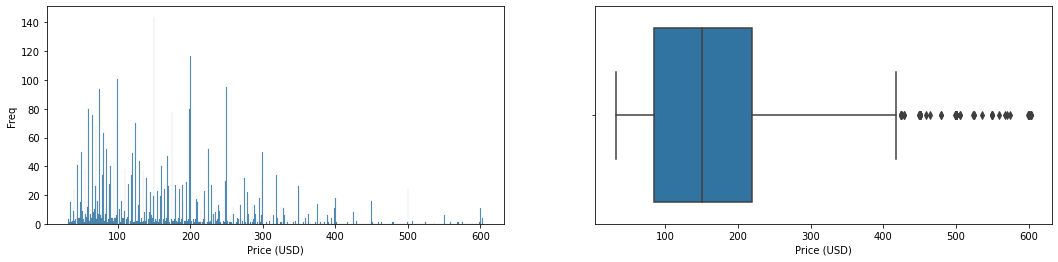

In [59]:
#Calculate range to exclude the outliers
x = boston_df3_listings.price
upper, lower = np.percentile(x, [1,99])
y = np.clip(x, upper, lower)
indexPersoncnt = boston_df3_listings[ boston_df3_listings['price'] != y].index
boston_df3_listings.drop(indexPersoncnt , inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.histplot(data=boston_df3_listings,x='price',discrete=True,ax=ax[0]) #multiple="stack",ax=ax[0]);
sns.boxplot(data=boston_df3_listings,x='price',ax=ax[1]);
ax[0].set_ylabel('Freq');
ax[0].set_xlabel('Price (USD)');
ax[1].set_xlabel('Price (USD)');

In [60]:
price = boston_df3_listings.groupby('neighbourhood_cleansed')['price'].mean().to_frame()

#### Function to estimate the revenue per listings

In [61]:
def estimate_revenue(reviews, listings, price):
    ''' Function to estimate the revenue per listings, assuming a 50% of reviews for each booking
        Params:
        reviews: int, number of reviews
        listings: int, total listings
        '''
    review_coeficient = 0.11   # Ratio between reviews and listings
    booking_coeficient = 2 # Assume 50% reviews for each booking
    revenue = 0
    
    if (listings == 0 and reviews == 0):
        revenue = 0                         # No listings, no bookings possible
    elif (reviews == 0 and listings > 0):   # There is listings but no reviews
        revenue = review_coeficient * listings * price
    elif (booking_coeficient*reviews <= listings):
        revenue = booking_coeficient * reviews * price
    
    else:                         # More reviews than listings, assume 100% booking
        revenue = listings * price

        
    return revenue
        
        
    
    

## Estimate the revenue per listing

In [62]:
df_revenue = boston_df3_listings[['id','price','number_of_reviews', 'availability_365','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].copy()


In [63]:
df_revenue['revenue'] = df_revenue.apply(lambda x: estimate_revenue(x['number_of_reviews'], x['availability_365'],x['price']), axis=1)

### Add the results to the general dataset

<ipython-input-64-a55aa2361af1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_revenue[df_revenue.revenue >0].hist(bins=100,ax=ax);


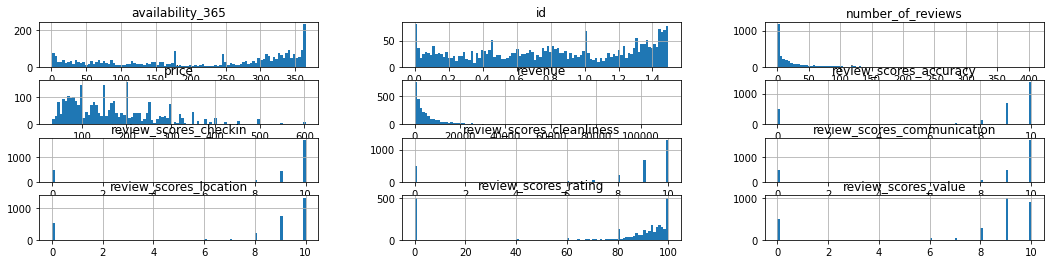

In [64]:
fig, ax = plt.subplots(figsize=(18,4))

df_revenue[df_revenue.revenue >0].hist(bins=100,ax=ax);


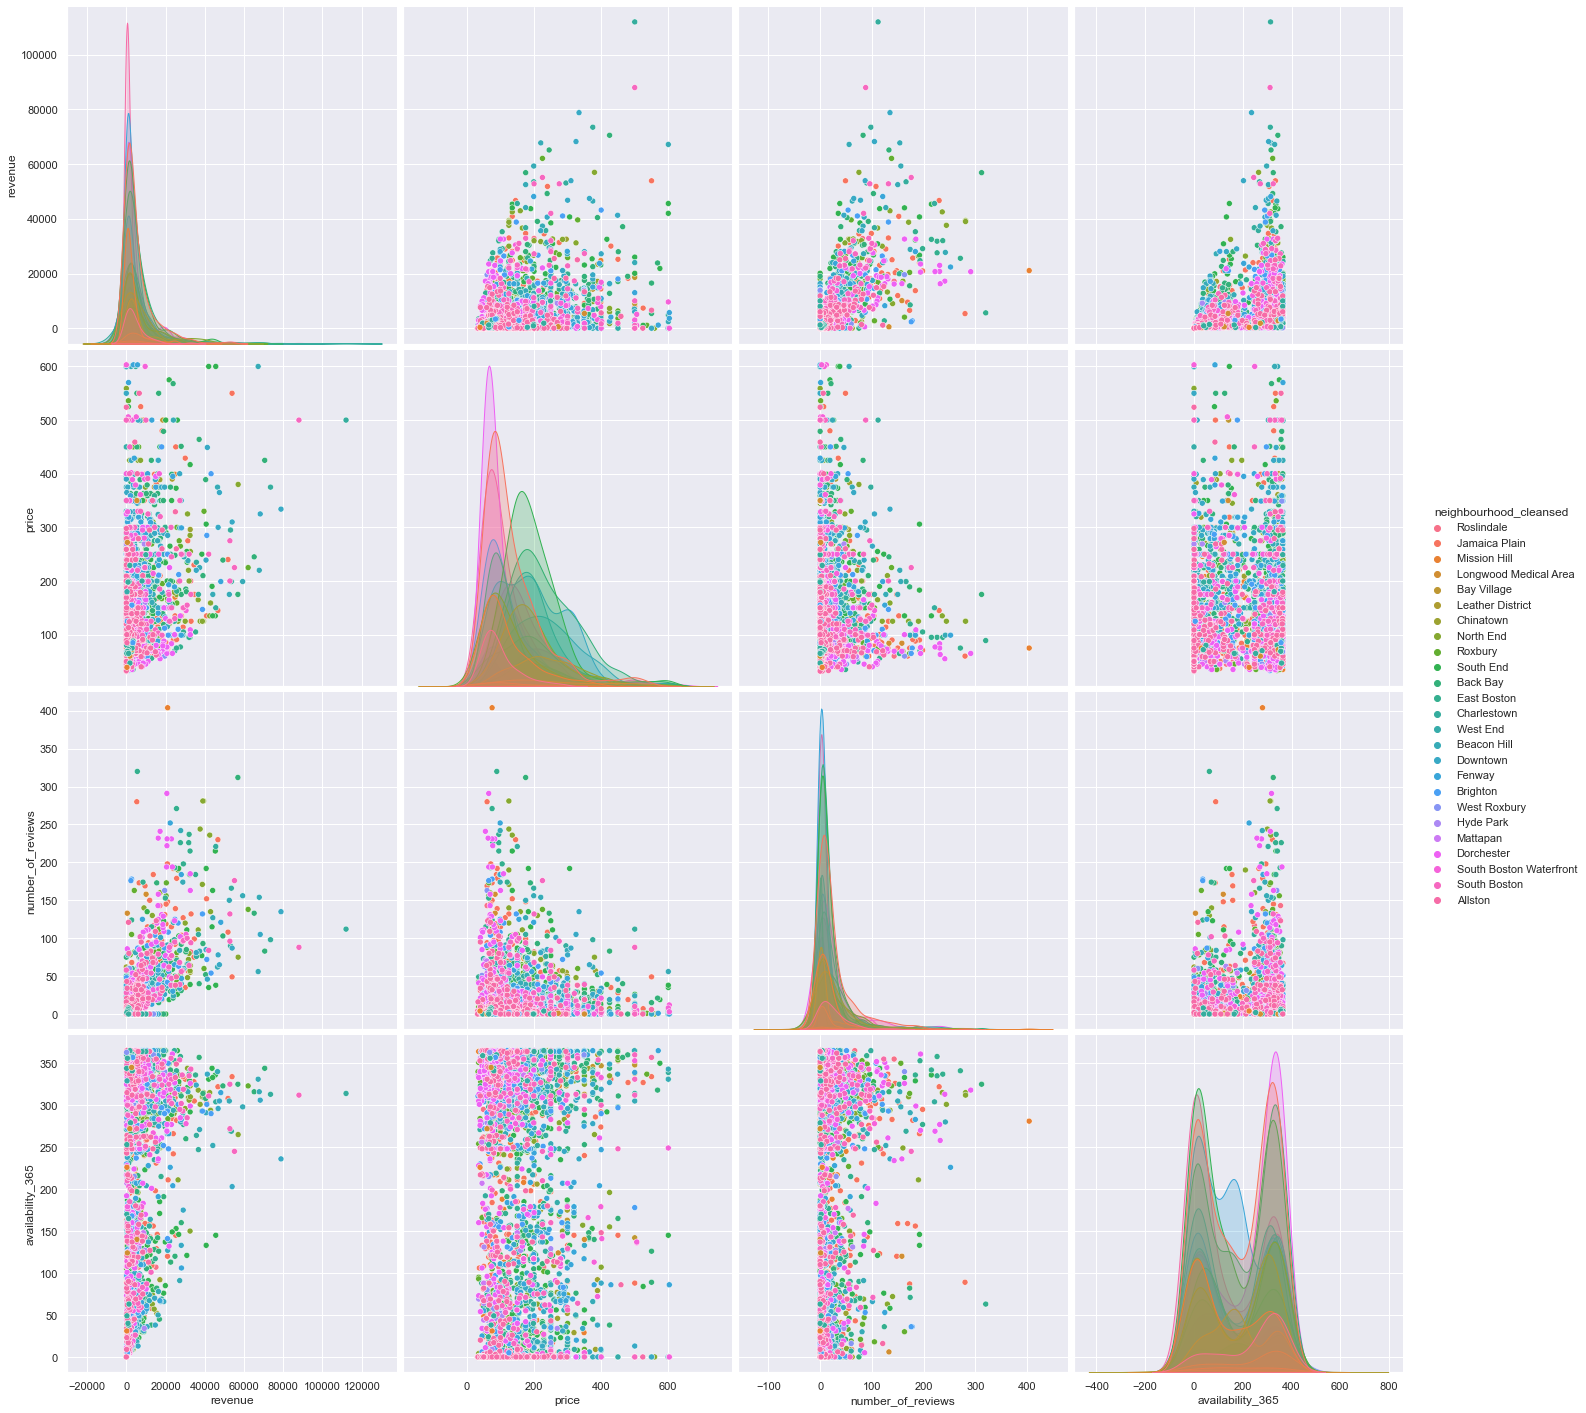

In [65]:
sns.set(rc={'figure.figsize':(20,15)})
sns.pairplot(df_revenue[['neighbourhood_cleansed','revenue','price','number_of_reviews','availability_365']],height=5,hue='neighbourhood_cleansed')

<AxesSubplot:xlabel='price', ylabel='revenue'>

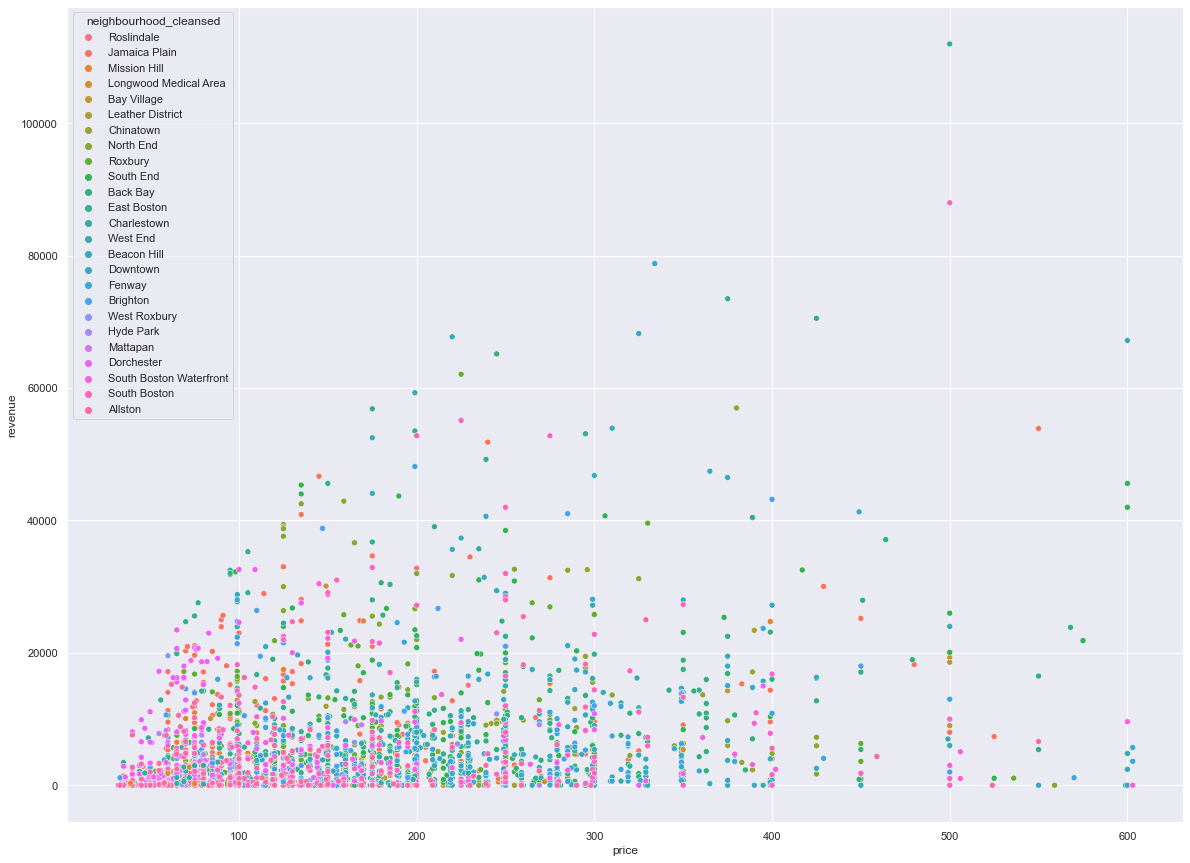

In [66]:
sns.scatterplot(x='price',y='revenue',data=df_revenue,hue='neighbourhood_cleansed')

<AxesSubplot:>

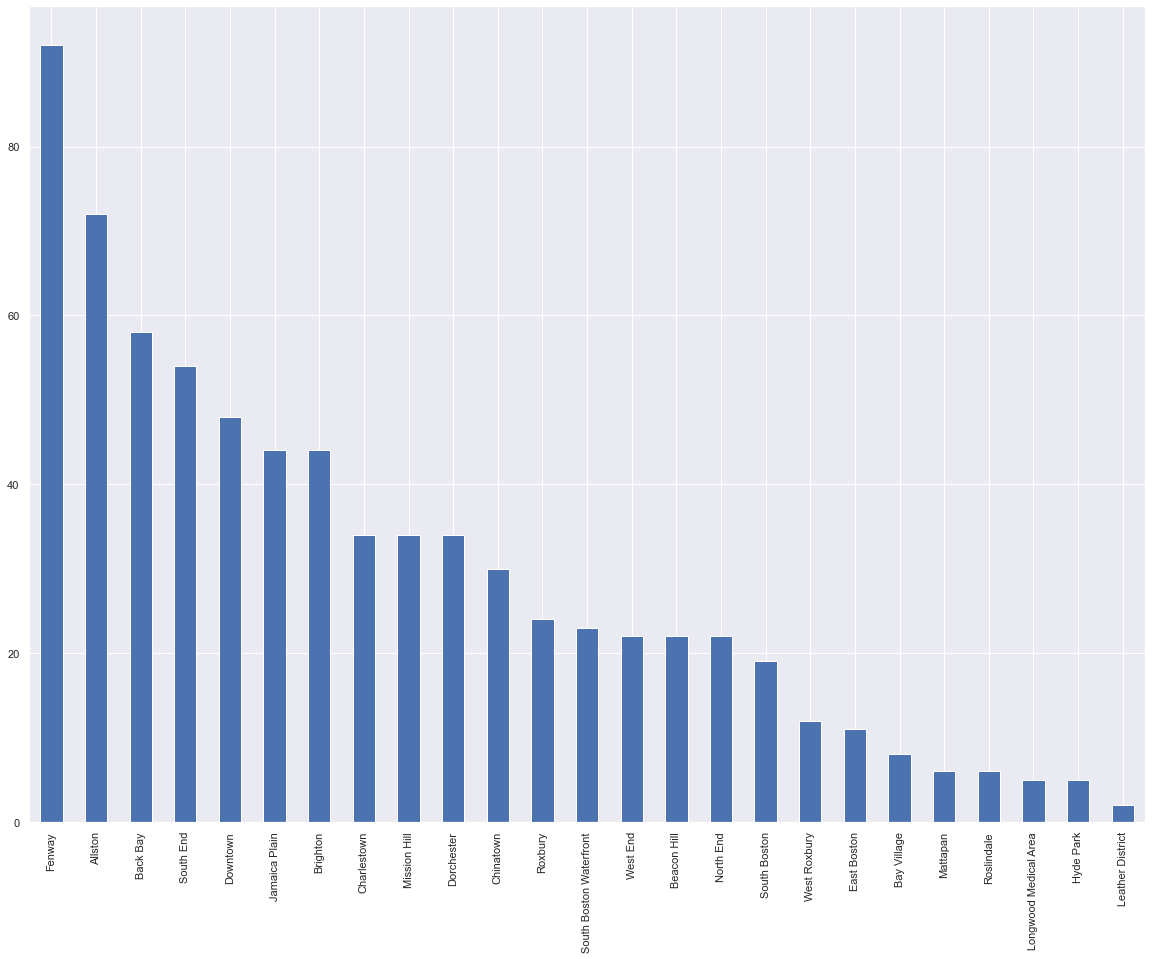

In [67]:
df_revenue[df_revenue.number_of_reviews == 0]['neighbourhood_cleansed'].value_counts().plot.bar()

## who has more reviews
## who generates more revenues

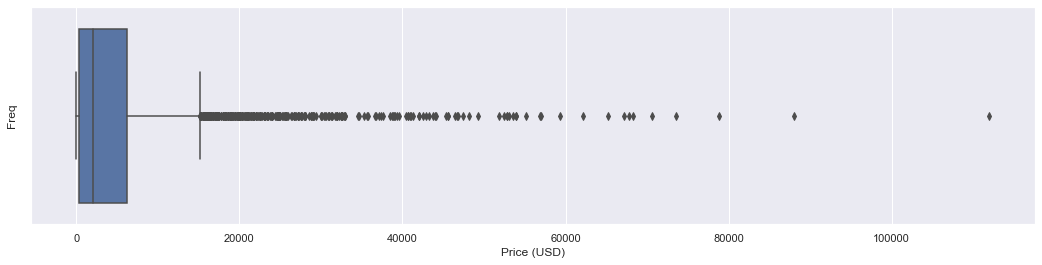

In [68]:
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(data=df_revenue,x='revenue',ax=ax);
ax.set_ylabel('Freq');
ax.set_xlabel('Price (USD)');


In [69]:
totals_df_mean = df_revenue.groupby('neighbourhood_cleansed').mean()
totals_df_summary = df_revenue.groupby('neighbourhood_cleansed').sum()
totals_df_counts = df_revenue.groupby('neighbourhood_cleansed').count()

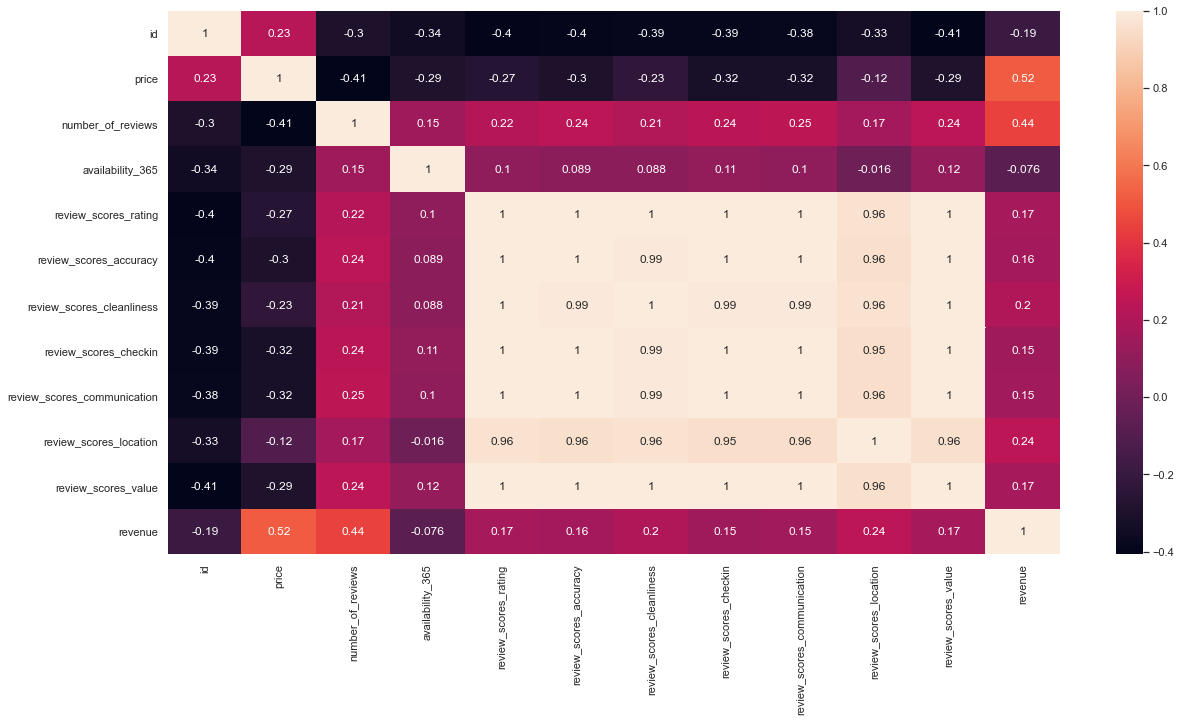

In [71]:
plt.figure(figsize=(20,10))
corr = totals_df_mean.corr()
sns.heatmap(corr, annot=True);

<AxesSubplot:ylabel='Frequency'>

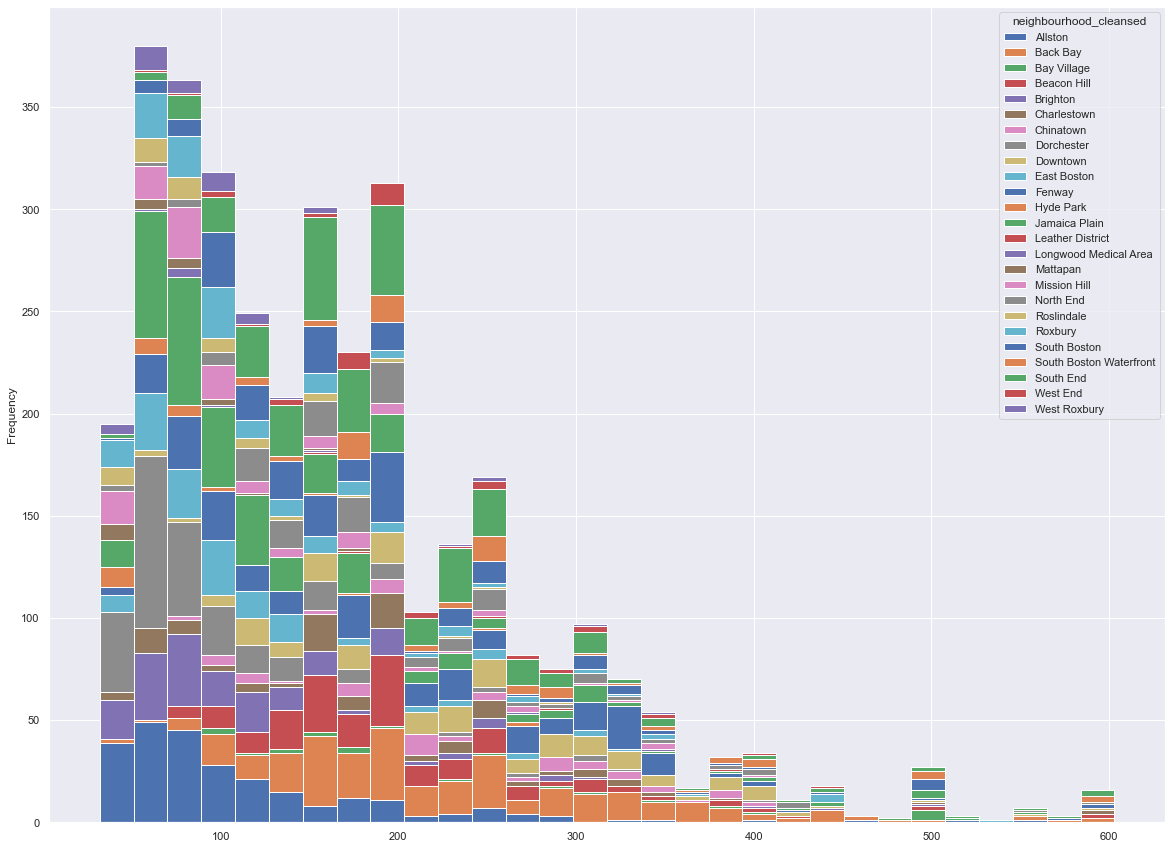

In [72]:
(boston_df3_listings.pivot(columns = "neighbourhood_cleansed", values = "price").plot.hist(bins = 30, stacked = True))

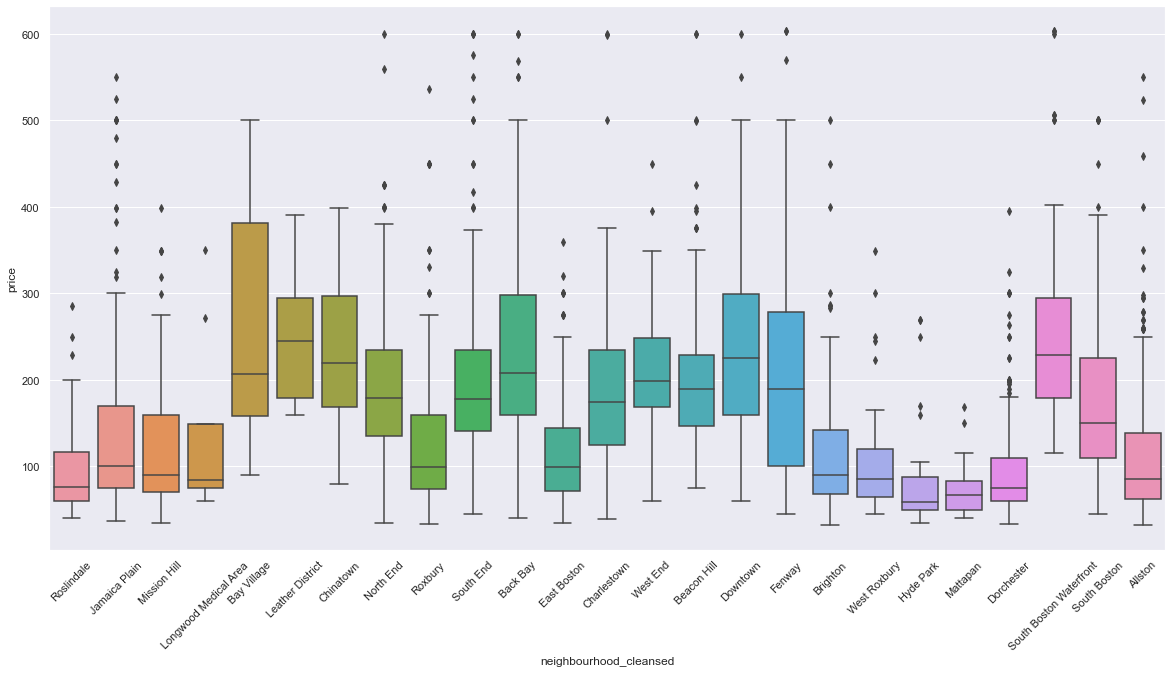

In [73]:
plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
sns.boxplot(x = "neighbourhood_cleansed", y = "price", data = df_revenue)
xticklabels = df_revenue['neighbourhood_cleansed']
plt.xticks(rotation=45);

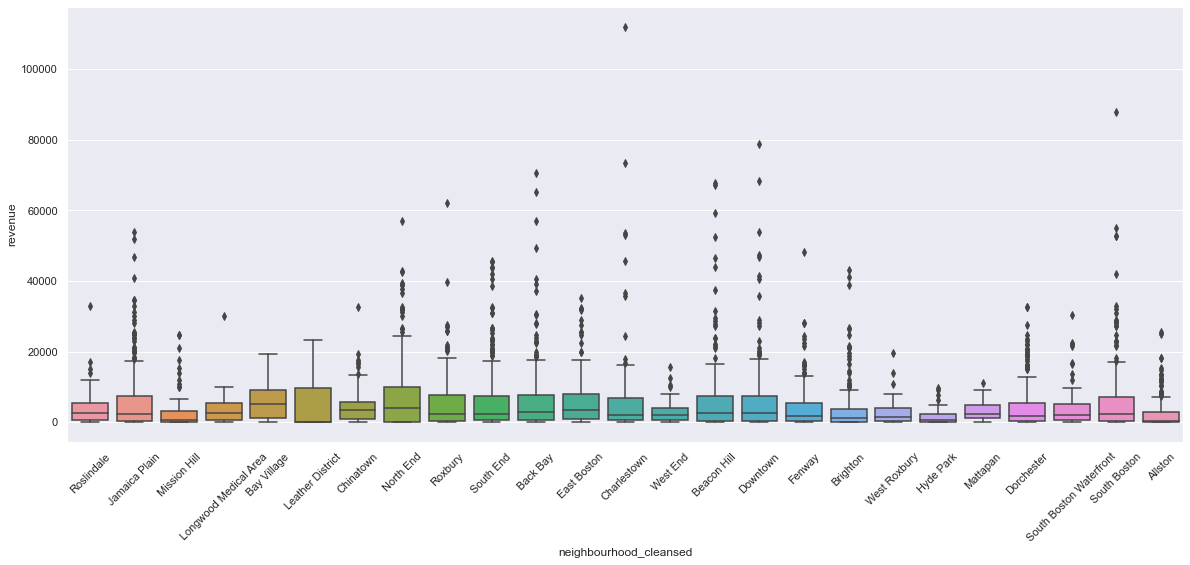

In [74]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(x = "neighbourhood_cleansed", y = "revenue", data = df_revenue)
plt.xticks(rotation=45);

<AxesSubplot:xlabel='number_of_reviews', ylabel='revenue'>

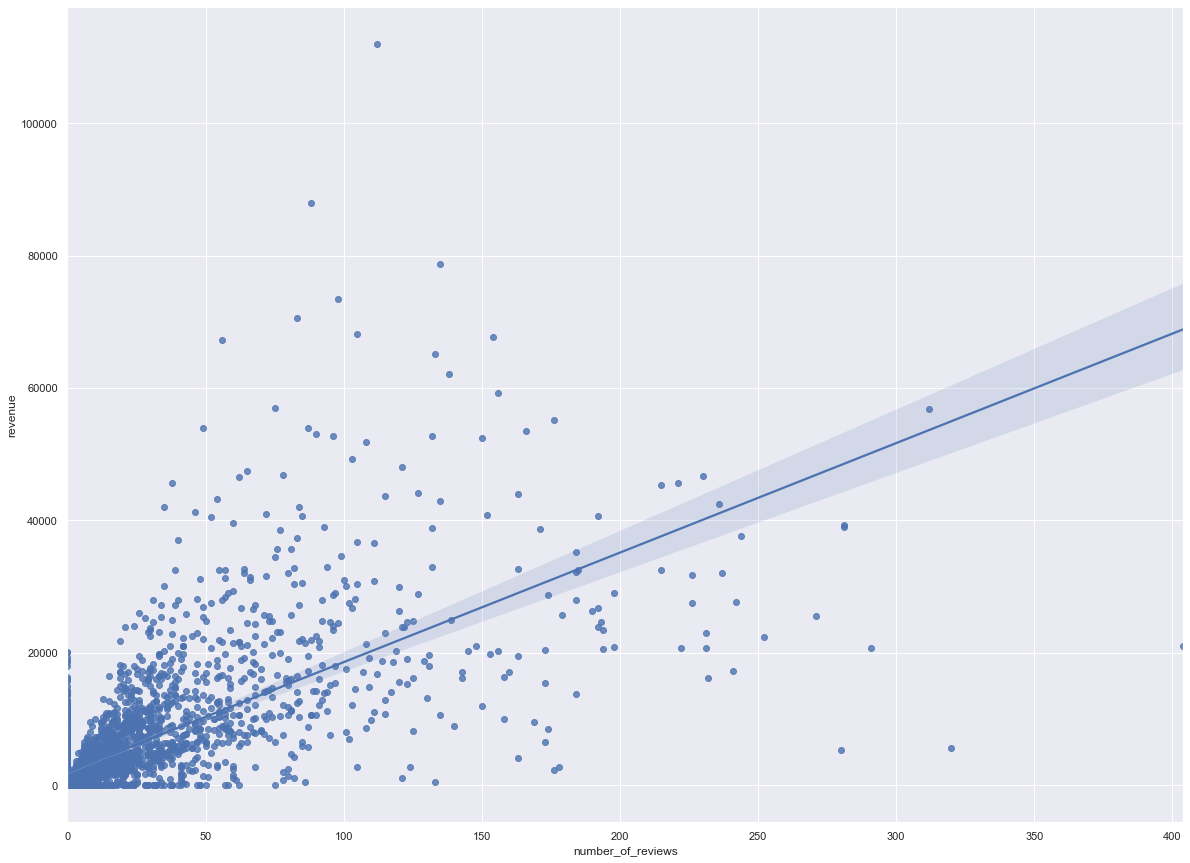

In [75]:
sns.regplot(x='number_of_reviews',y='revenue',data=df_revenue)

<AxesSubplot:ylabel='Frequency'>

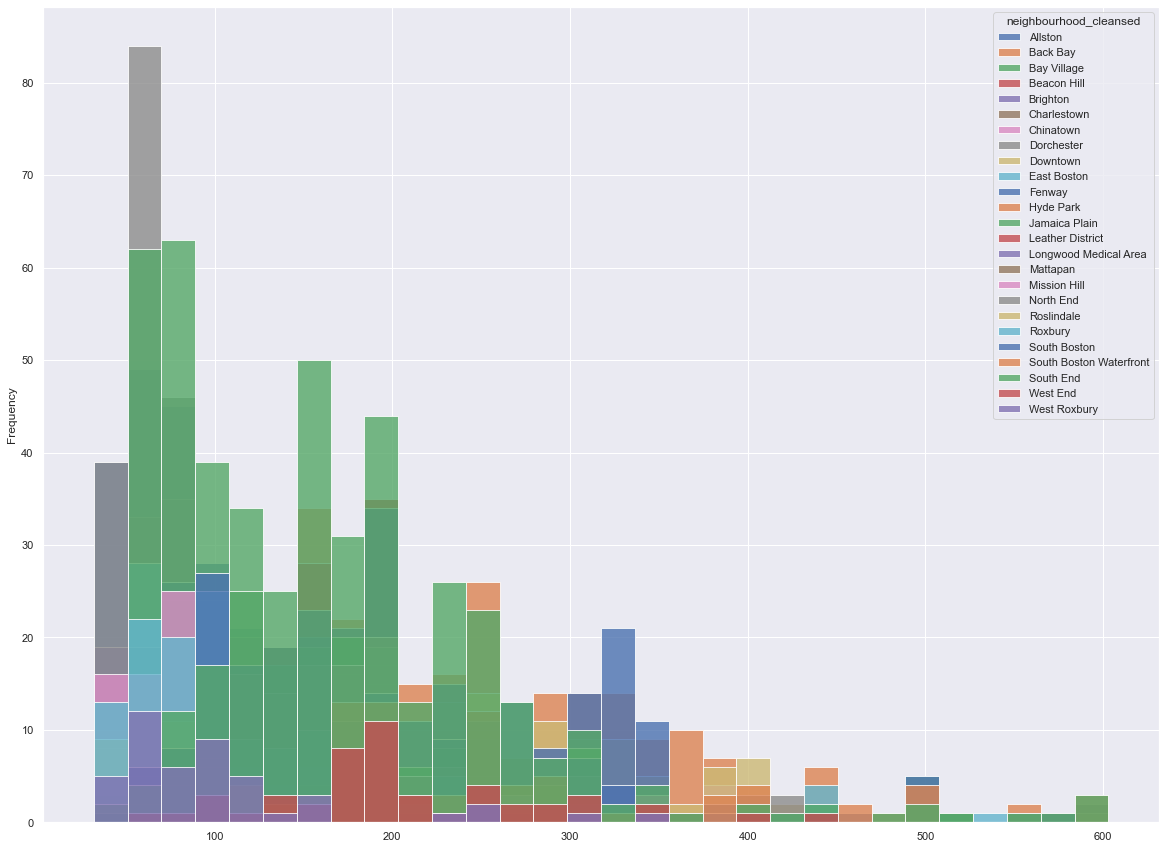

In [76]:
(df_revenue.pivot(columns = "neighbourhood_cleansed", values = "price").plot.hist(bins = 30, stacked = False, alpha = 0.8))

<AxesSubplot:ylabel='revenue'>

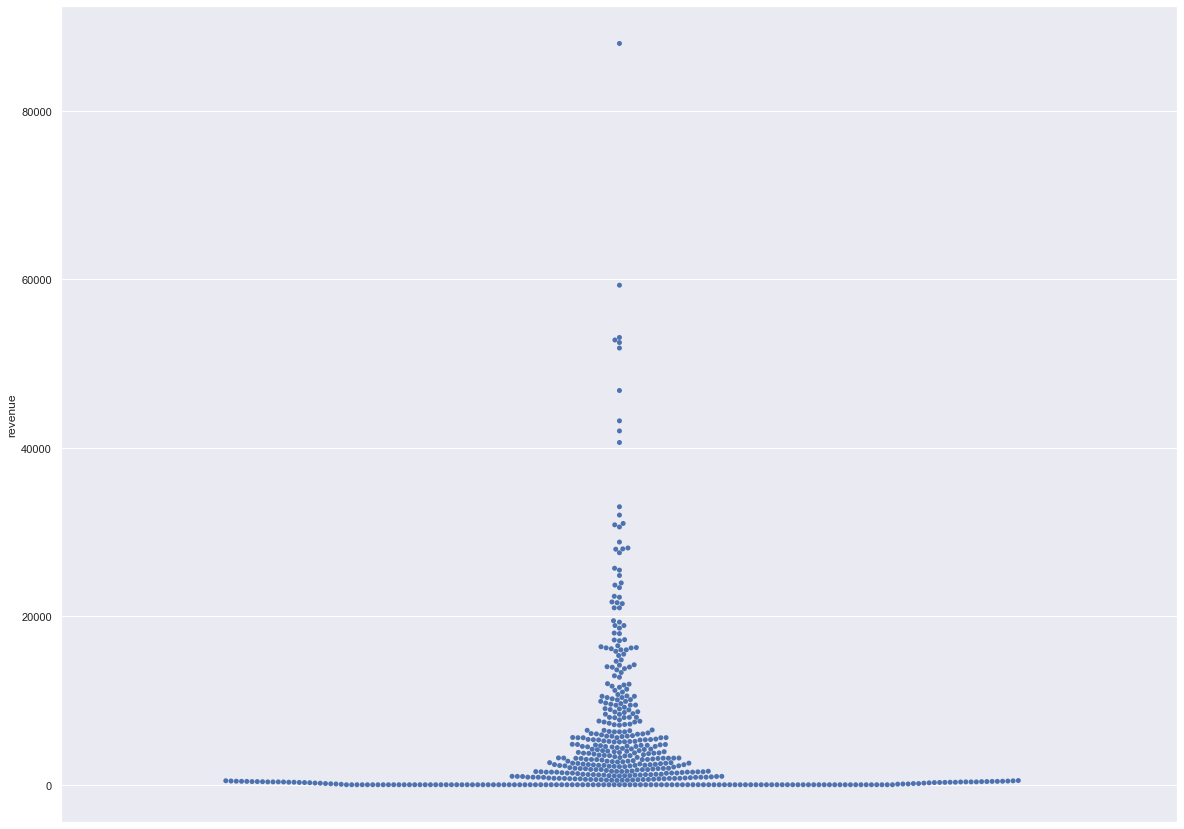

In [77]:
sns.swarmplot(y=df_revenue.revenue.sample(500))

<AxesSubplot:ylabel='revenue'>

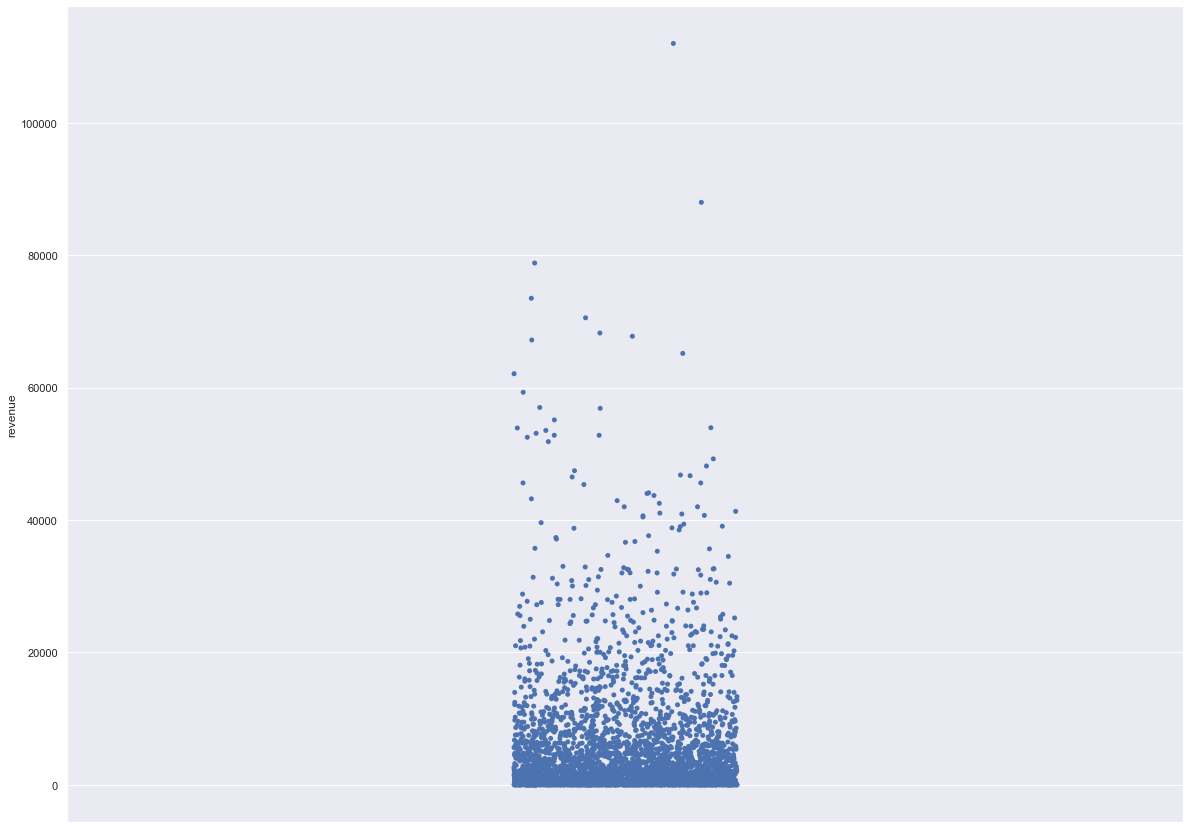

In [78]:
sns.stripplot(y=df_revenue.revenue)

### Descriptive Stats to explore relations between features

### MAP with the number of listings in the Boston Area

In [79]:
latitude = 42.35843
longitude = -71.05977

In [80]:
import folium
# create map and display it
boston_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [81]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
boston_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
listings = plugins.MarkerCluster().add_to(boston_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(boston_df3_listings.latitude, boston_df3_listings.longitude, boston_df3_listings.neighbourhood_cleansed):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=folium.Popup(label),).add_to(listings)

# display map
boston_map

### Choropleth map with the mean price per Neighborbood

In [89]:
totals_df_mean.reset_index(inplace=True)

In [82]:
boston_df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
month              0
year               0
dayofweek          0
dtype: int64

In [83]:
price = boston_df3_listings.groupby('neighbourhood_cleansed')['price'].mean().to_frame()
price.reset_index(inplace=True)

In [84]:
price.columns = ['neighbourhood','price']

In [93]:
boston_geo = r'neighbourhoods.geojson'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(price['price'].min(),
                              price['price'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.

boston_map = folium.Map(location = [latitude, longitude], zoom_start = 12,tiles='Mapbox Bright')
choropleth = folium.Choropleth(
    geo_data=boston_geo,
    data=price,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average price in Boston Area',
    reset=True
).add_to(boston_map)

boston_map

In [92]:
boston_geo = r'neighbourhoods.geojson'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(totals_df_mean['revenue'].min(),
                              totals_df_mean['revenue'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater 

print(threshold_scale)

# let Folium determine the scale.

boston_map = folium.Map(location = [latitude, longitude], zoom_start = 12,tiles='Mapbox Bright')
choropleth = folium.Choropleth(
    geo_data=boston_geo,
    data=totals_df_mean,
    columns=['neighbourhood_cleansed', 'revenue'],
    key_on='feature.properties.neighbourhood',
    threshold_scale=threshold_scale,
    fill_color='BuGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average price in Boston Area',
    reset=True, highlight=True
).add_to(boston_map)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['neighbourhood'], style=style_function, labels=False))
boston_map

[1962, 3202, 4442, 5682, 6922, 8163]


In [788]:
import folium

# file name - file is located in the working directory
communities_geo = r'spain-communities.geojson' # geojson file

# create a plain world map
communities_map = folium.Map(location=[40.416775, -3.703790], zoom_start=6, tiles='stamenwatercolor')

# add tile layers to the map
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(communities_map)

# generate choropleth map 
choropleth = folium.Choropleth(
    geo_data=communities_geo,
    data=df,
    columns=['community', '2018'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Births per 1000 inhabitants',
    highlight=True,
    smooth_factor=0).add_to(communities_map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(communities_map)

# display map
communities_map

AttributeError: module 'folium' has no attribute 'Choropleth'

In [86]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

AttributeError: 'NoneType' object has no attribute 'add_to'

In [789]:
print(folium.Map.GeoJsonTooltip.__doc__)


AttributeError: type object 'Map' has no attribute 'GeoJsonTooltip'

In [759]:
totals_df_mean['revenue'].max()

8162.729650349649

### Average price per neighborehood

In [130]:
totals_df_mean.reset_index(inplace=True)

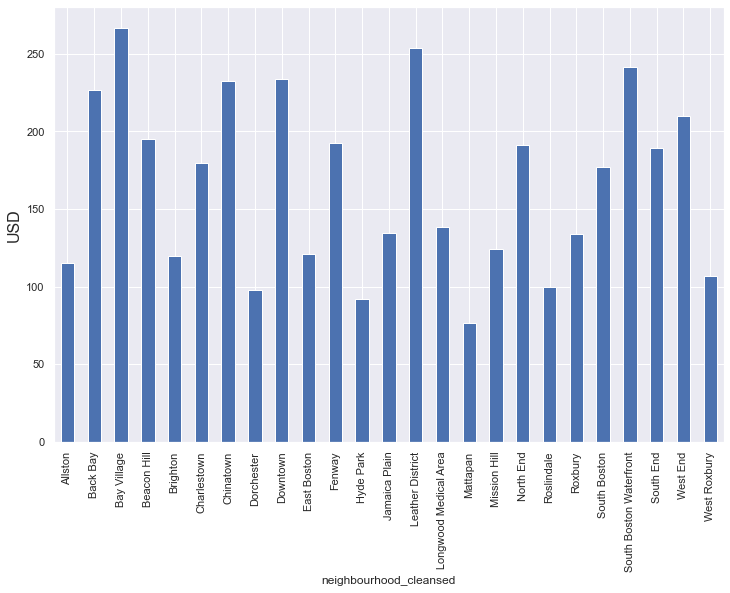

In [2520]:
plt.figure(figsize=(12,8))
boston_df3_listings.groupby('neighbourhood_cleansed')['price'].mean().plot.bar();
plt.ylabel('USD',fontsize=16);

In [134]:
boston_df3_listings.columns.to_frame()

0
id                                     id
host_response_rate     host_response_rate
host_acceptance_rate  host_acceptance_...
host_listings_count   host_listings_count
host_total_listin...  host_total_listi...
...                                   ...
bed_type_Real Bed       bed_type_Real Bed
cancellation_poli...  cancellation_pol...
cancellation_poli...  cancellation_pol...
cancellation_poli...  cancellation_pol...
cancellation_poli...  cancellation_pol...

[103 rows x 1 columns]

## MODELING

### A mulitple linear regresion model will be used to predict the price

### Select and normalize all the features

In [703]:
df3_cero = boston_df3_listings[(boston_df3_listings.number_of_reviews == 0) | (boston_df3_listings.availability_365 == 0)]

<AxesSubplot:xlabel='year,month,available'>

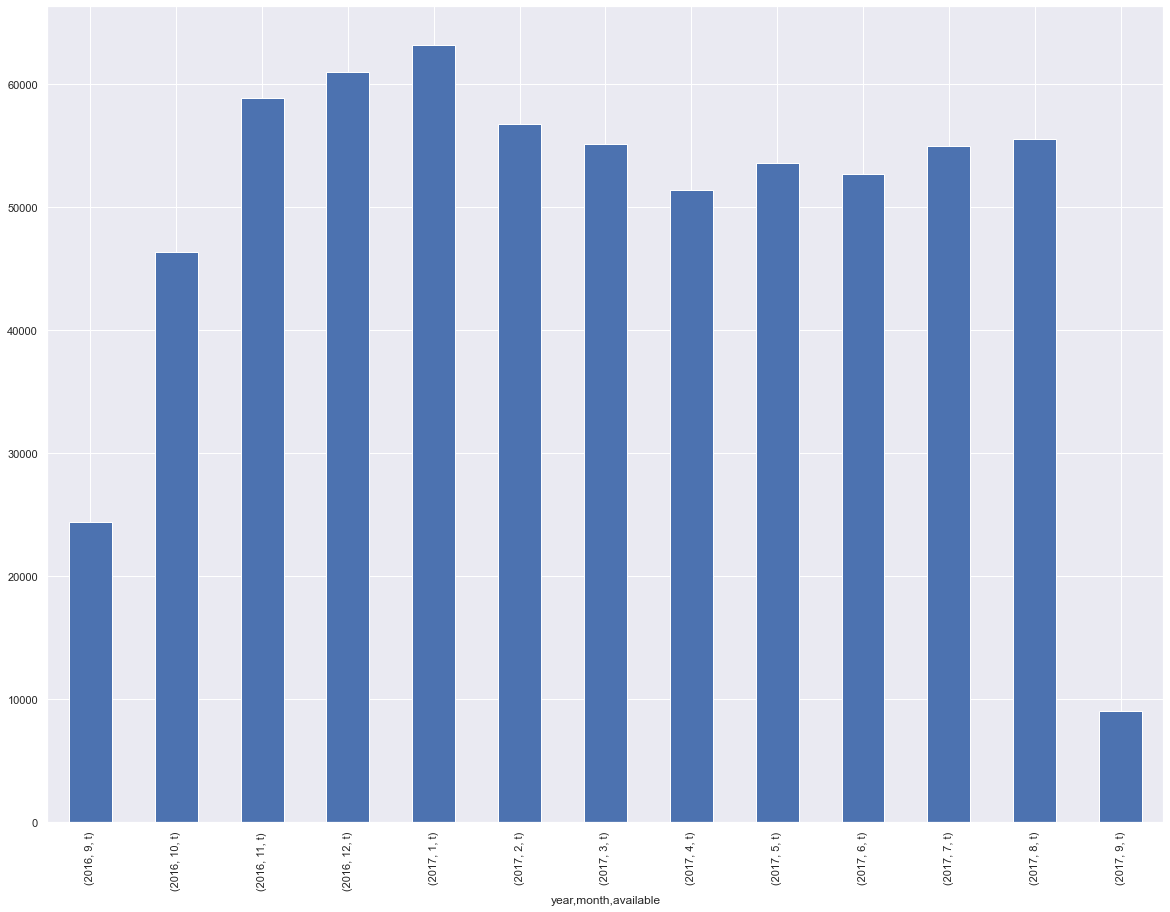

In [749]:
boston_df_calendar[boston_df_calendar.available =='t'].groupby(['year','month','available'])['date'].count().plot.bar()

In [704]:
df3_cero

(1161, 103)

In [719]:
df3_no_cero = boston_df3_listings[(boston_df3_listings.number_of_reviews > 0) & (boston_df3_listings.availability_365 > 0)]

In [734]:
df3_cero.groupby('neighbourhood_cleansed')['price'].mean() - df3_no_cero.groupby('neighbourhood_cleansed')['price'].mean()

neighbourhood_cleansed
Allston                      4.885765
Back Bay                    -7.558907
Bay Village                 14.685714
Beacon Hill                -10.103989
Brighton                   -14.978656
Charlestown                 -7.288913
Chinatown                  -33.071542
Dorchester                   9.962814
Downtown                     6.771895
East Boston                 12.450251
Fenway                     -17.244975
Hyde Park                   10.875000
Jamaica Plain               -8.492796
Leather District          -170.500000
Longwood Medical Area      -15.850000
Mattapan                    -3.605042
Mission Hill                -0.171717
North End                    4.246452
Roslindale                  22.545455
Roxbury                    -21.578873
South Boston                -2.157254
South Boston Waterfront     26.517483
South End                  -18.313935
West End                   -29.612040
West Roxbury                40.812500
Name: price, dtype: float64

In [733]:
df3_no_cero.groupby('neighbourhood_cleansed')['price'].mean()

neighbourhood_cleansed
Allston                    111.622047
Back Bay                   234.221698
Bay Village                260.714286
Beacon Hill                202.296296
Brighton                   122.109091
Charlestown                189.074627
Chinatown                  248.189189
Dorchester                  91.980583
Downtown                   235.486726
East Boston                117.913386
Fenway                     204.573333
Hyde Park                   85.500000
Jamaica Plain              138.504032
Leather District           390.000000
Longwood Medical Area      147.250000
Mattapan                    76.176471
Mission Hill               119.727273
North End                  194.193548
Roslindale                  94.000000
Roxbury                    136.336449
South Boston               177.395349
South Boston Waterfront    252.636364
South End                  201.577093
West End                   225.304348
West Roxbury                94.687500
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

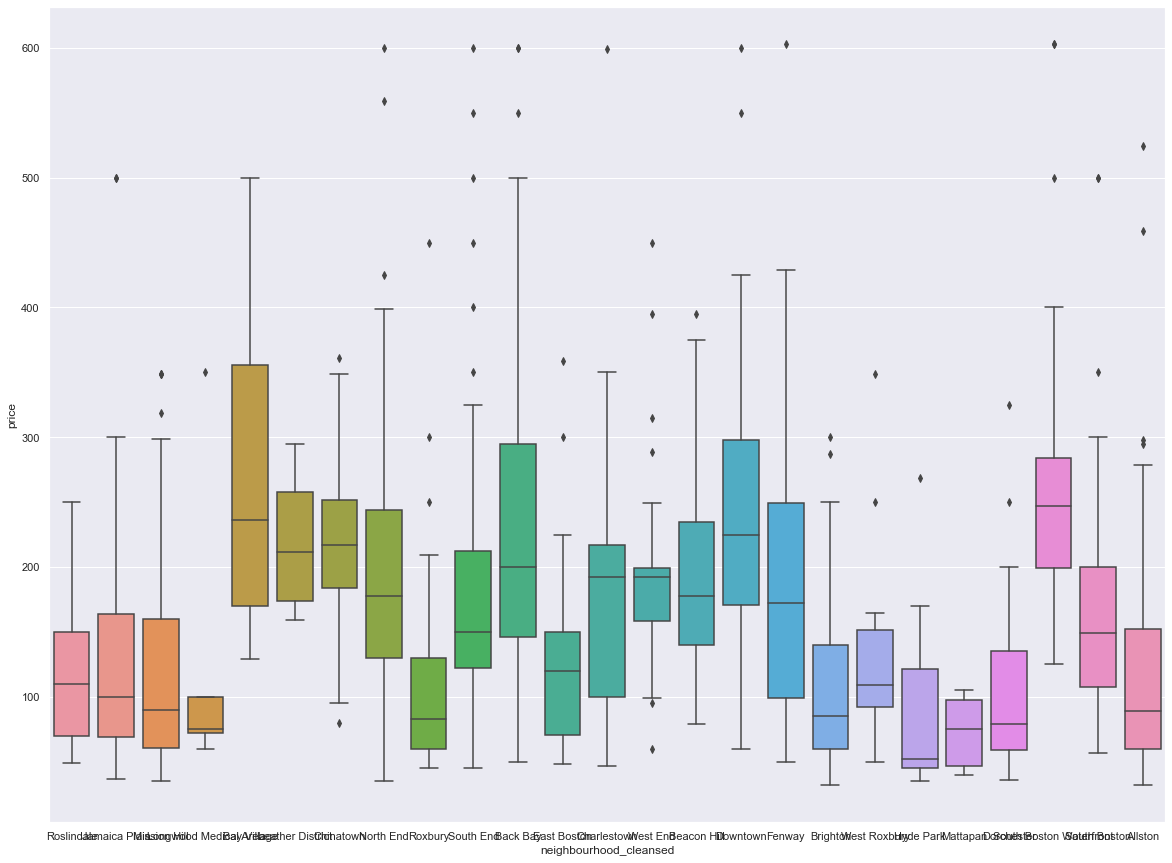

In [729]:
sns.boxplot(x = "neighbourhood_cleansed",y='price',data=df3_cero)

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

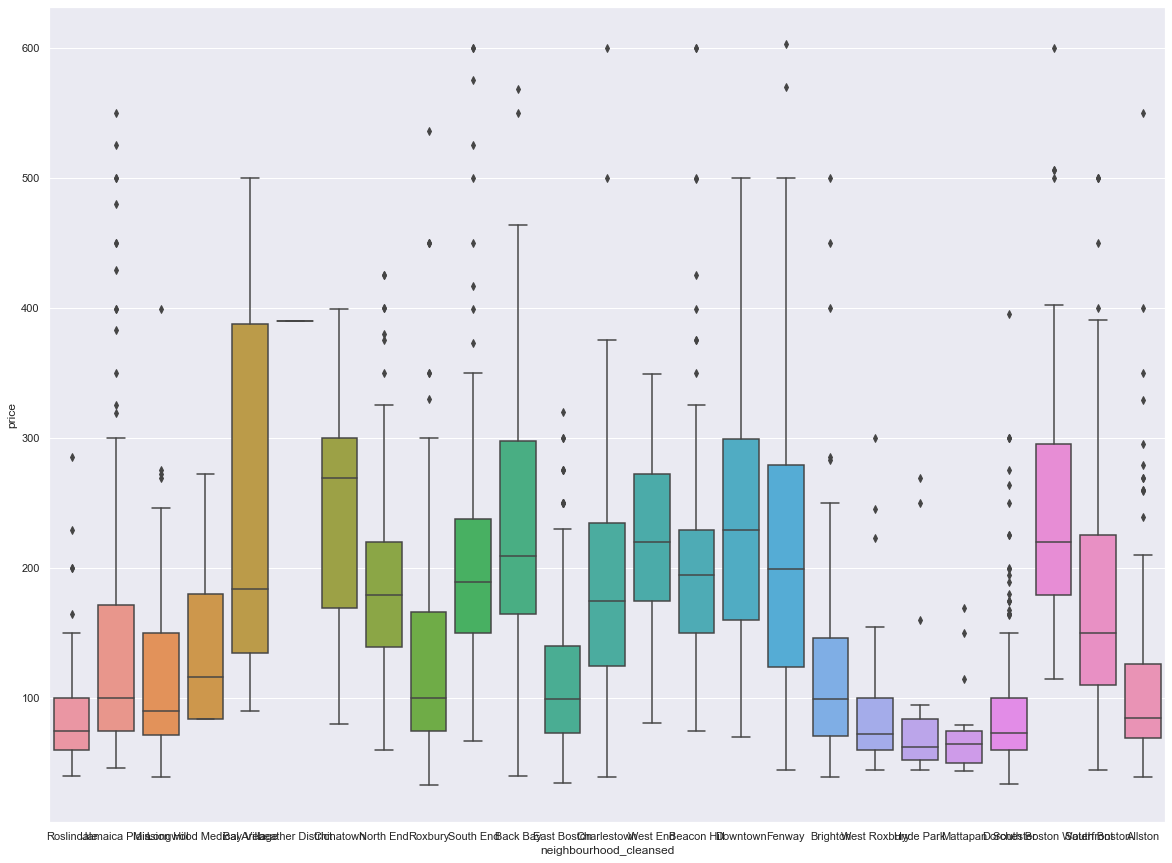

In [730]:
sns.boxplot(x = "neighbourhood_cleansed",y='price',data=df3_no_cero)

In [681]:
y = boston_df3_listings['price'].values

In [706]:
y = df3_cero['price'].values

In [630]:
X_df = boston_df3_listings[(boston_df3_listings.number_of_reviews >0) & (boston_df3_listings.availability_365 >0)].drop(columns=['price','id','zipcode','neighbourhood_cleansed','host_listings_count','Iron', 'Kitchen', 'Pool', 'Shampoo', 'TV', 'Washer',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Camper/RV',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Entire Floor', 'property_type_Guesthouse',
       'property_type_House',
       'availability_60', 'availability_90',
         'room_type_Shared room','cancellation_policy_strict','bed_type_Real Bed','property_type_Villa','"Wireless Internet"', 'Heating','"Free Parking on Street"', '"Other pet(s)"',
       '"Paid Parking Off Premises"', '"Washer / Dryer"',
       'property_type_Other', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Pull-out Sofa','"Laptop Friendly Workspace"'])

In [707]:
X_df = df3_cero.drop(columns=['price','id','zipcode','neighbourhood_cleansed','host_listings_count','Iron', 'Kitchen', 'Pool', 'Shampoo', 'TV', 'Washer',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Camper/RV',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Entire Floor', 'property_type_Guesthouse',
       'property_type_House',
       'availability_60', 'availability_90',
         'room_type_Shared room','cancellation_policy_strict','bed_type_Real Bed','property_type_Villa','"Wireless Internet"', 'Heating','"Free Parking on Street"', '"Other pet(s)"',
       '"Paid Parking Off Premises"', '"Washer / Dryer"',
       'property_type_Other', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Pull-out Sofa','"Laptop Friendly Workspace"'])

In [694]:
X_df[X_df.availability_365 == 0].count()

host_response_rate                     169
host_acceptance_rate                   169
host_total_listings_count              169
host_is_superhost                      169
availability_30                        169
                                      ... 
room_type_Private room                 169
bed_type_Futon                         169
cancellation_policy_flexible           169
cancellation_policy_moderate           169
cancellation_policy_super_strict_30    169
Length: 66, dtype: int64

In [626]:
X_df.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'host_is_superhost', 'availability_30',
       'availability_365', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'bus-stop',
       'restaurants-near', 'downtown-near', 'park-near', '"24-Hour Check-in"',
       '"Air Conditioning"', '"Buzzer/Wireless Intercom"', '"Cable TV"',
       '"Carbon Monoxide Detector"', '"Elevator in Building"',
       '"Family/Kid Friendly"', '"Fire Extinguisher"', '"First Aid Kit"',
       '"Free Parking on Premises"', '"Hair Dryer"', '"Hot Tub"',
       '"Indoor Fireplace"', '"Lock on Bedroom Door"', '"Pets Allowed"',
       '"Pets live on this property"', '"Safety Ca

In [708]:
X = X_df.values

### Standarize all the features using MinMaxScaler

In [709]:
from sklearn import preprocessing
#X= preprocessing.StandardScaler().fit(X).transform(X)
X= preprocessing.MinMaxScaler().fit(X).transform(X)
X[0:1]

array([[0.97557377, 0.93639344, 0.00133511, 0.        , 0.        ,
        0.        , 0.30223271, 0.22574058, 0.3       , 0.4       ,
        0.1875    , 0.125     , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

### Split the dataset in train and  testing datasets

In [710]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (928, 66) (928,)
Test set: (233, 66) (233,)


In [711]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ -3.06080073   7.53835143 -74.54239796  24.43210085  41.17693302
 -31.36660864  72.79492155  63.0466773   36.61846283 133.69703213
 227.12481016   0.26533941  33.03540437 -27.70569585  22.24902224
 -83.71146858  27.23318903  15.58604823 -43.53357169  51.93027935
 -17.53863951 -31.41063458  -2.40593465  15.72813782 -13.34087036
  10.0922965   -1.89537578  18.90468275   6.67076908  22.55165388
  10.0892562   12.65625145   8.94899826  -4.50262686   6.35918255
 -16.44056001  10.99754977 -20.53976891  37.59020408  -7.0206225
  -6.01066558 -12.99857934 -18.13401045 -12.95737738 -14.0571208
  -4.49218239  -6.27797823  17.20865058 -11.47048904   6.26210493
  15.62313639  10.84490734  10.67486056 -10.24271951   4.02604949
  24.46437717 -17.73425156  -7.56319264 -24.1221054   10.02610829
  67.53682567  -0.51293109   4.75816111   3.11695908  18.06627643
 115.61991325]


In [712]:
regr.intercept_

-33.4517574061054

In [713]:
#boston_df3_listings[Features].columns[regr.coef_ < -30]

coefs = list(zip(regr.coef_, X_df))
coefs

[(-3.0608007287769725, 'host_response_rate'),
 (7.538351428319768, 'host_acceptance_rate'),
 (-74.54239796285076, 'host_total_listings_count'),
 (24.432100854328375, 'host_is_superhost'),
 (41.17693302343891, 'availability_30'),
 (-31.366608639832208, 'availability_365'),
 (72.7949215501149, 'latitude'),
 (63.046677296703564, 'longitude'),
 (36.61846282937529, 'bathrooms'),
 (133.69703212971126, 'bedrooms'),
 (227.1248101632294, 'beds'),
 (0.2653394128416018, 'guests_included'),
 (33.0354043730834, 'extra_people'),
 (-27.705695845209434, 'number_of_reviews'),
 (22.249022238261137, 'review_scores_rating'),
 (-83.71146858076655, 'review_scores_accuracy'),
 (27.233189033657137, 'review_scores_cleanliness'),
 (15.586048227984271, 'review_scores_checkin'),
 (-43.53357168557061, 'review_scores_communication'),
 (51.930279348013286, 'review_scores_location'),
 (-17.5386395105296, 'review_scores_value'),
 (-31.410634579401826, 'reviews_per_month'),
 (-2.4059346458090687, 'bus-stop'),
 (15.7281

In [714]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean absolute error: 54.77
Residual sum of squares (MSE): 6282.26
R2-score: -0.05
Variance score: 0.41


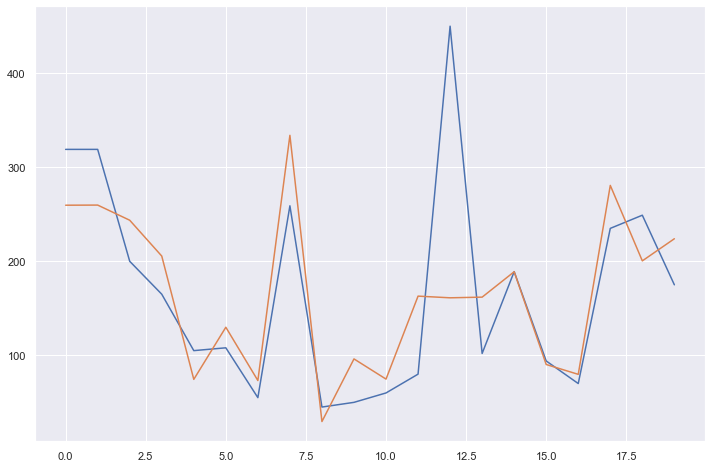

In [715]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(len(X_test[:20])),y_test[:20])
plt.plot(range(len(X_test[:20])),y_hat[:20])

(0.6455352814226125, 7.350846913645057e-29)


<AxesSubplot:>

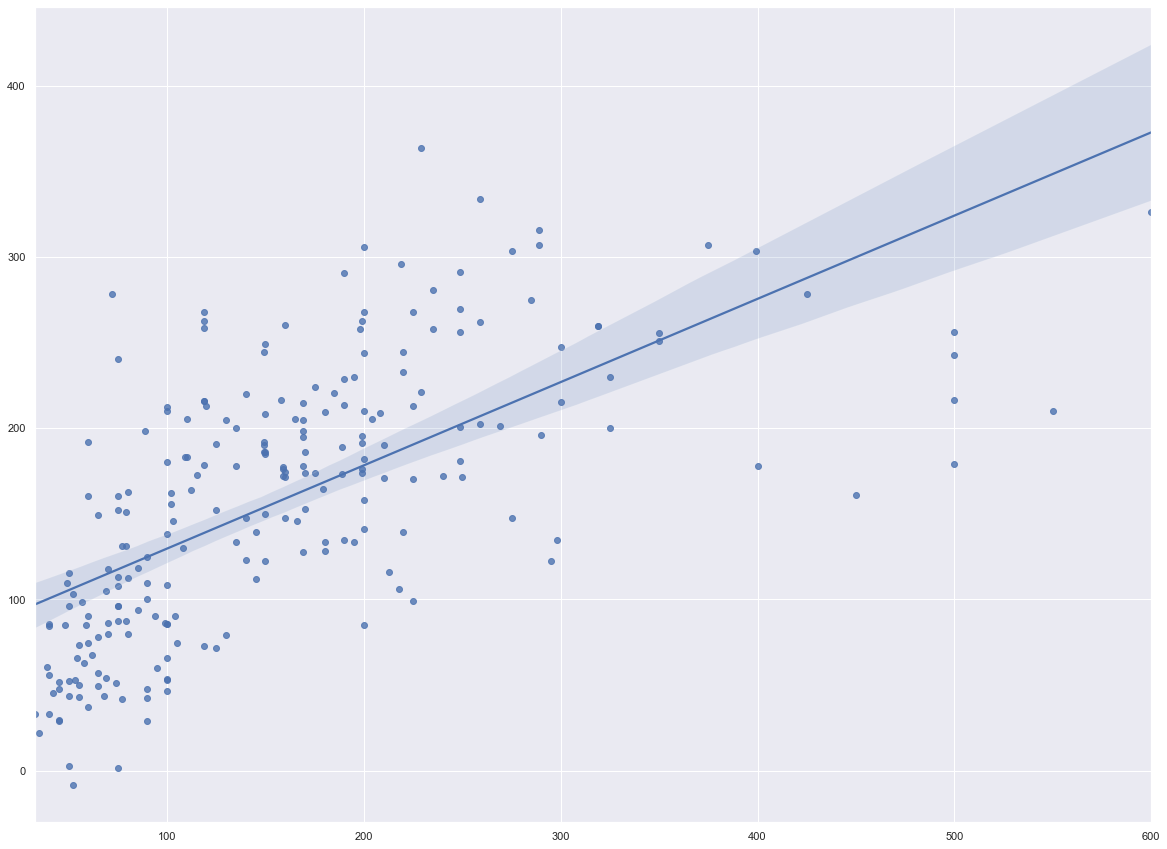

In [716]:
from scipy import stats
print(stats.pearsonr(y_test,y_hat))
sns.color_palette("tab10")
sns.color_palette("rocket", as_cmap=True)
sns.regplot(x=y_test,y=y_hat)

In [717]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [718]:

#X, y = make_regression(n_features=4, n_informative=2,   random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=14, random_state=0,criterion = 'mse', n_estimators = 100)
regr.fit(X_train, y_train)

y_hat= regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

print('Variance score: %.2f' % regr.score(X_test, y_test))



Mean absolute error: 49.70
Residual sum of squares (MSE): 6031.51
R2-score: -0.06
Variance score: 0.43


In [2537]:
from sklearn.model_selection import cross_val_score, GridSearchCV
gsc = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'max_depth': range(10,15),'criterion':('mse', 'mae'),'n_estimators': ( 50, 100, 500), },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
regr = gsc.fit(X_train, y_train)

print('Done')
#best_params = grid_result.best_params_
    
#regr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

KeyboardInterrupt: 

In [ ]:
regr.best_params_

In [ ]:
y_hat= regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

print('Variance score: %.2f' % regr.score(X_test, y_test))

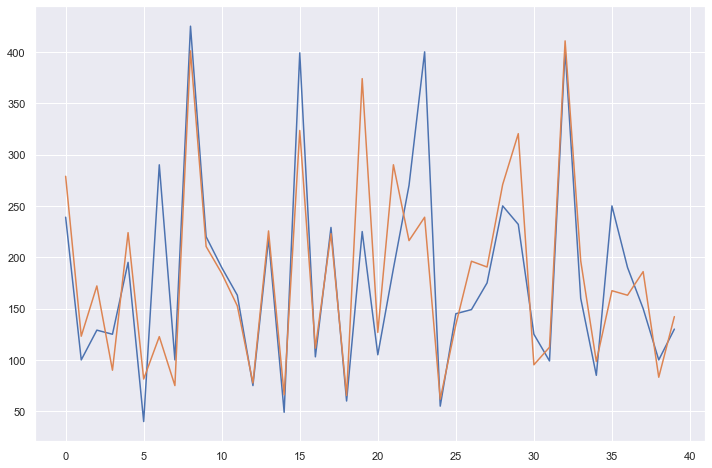

In [623]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(len(X_test[:40])),y_test[:40])
plt.plot(range(len(X_test[:40])),y_hat[:40])

(0.8643175159651085, 2.2076859147064667e-142)


<AxesSubplot:>

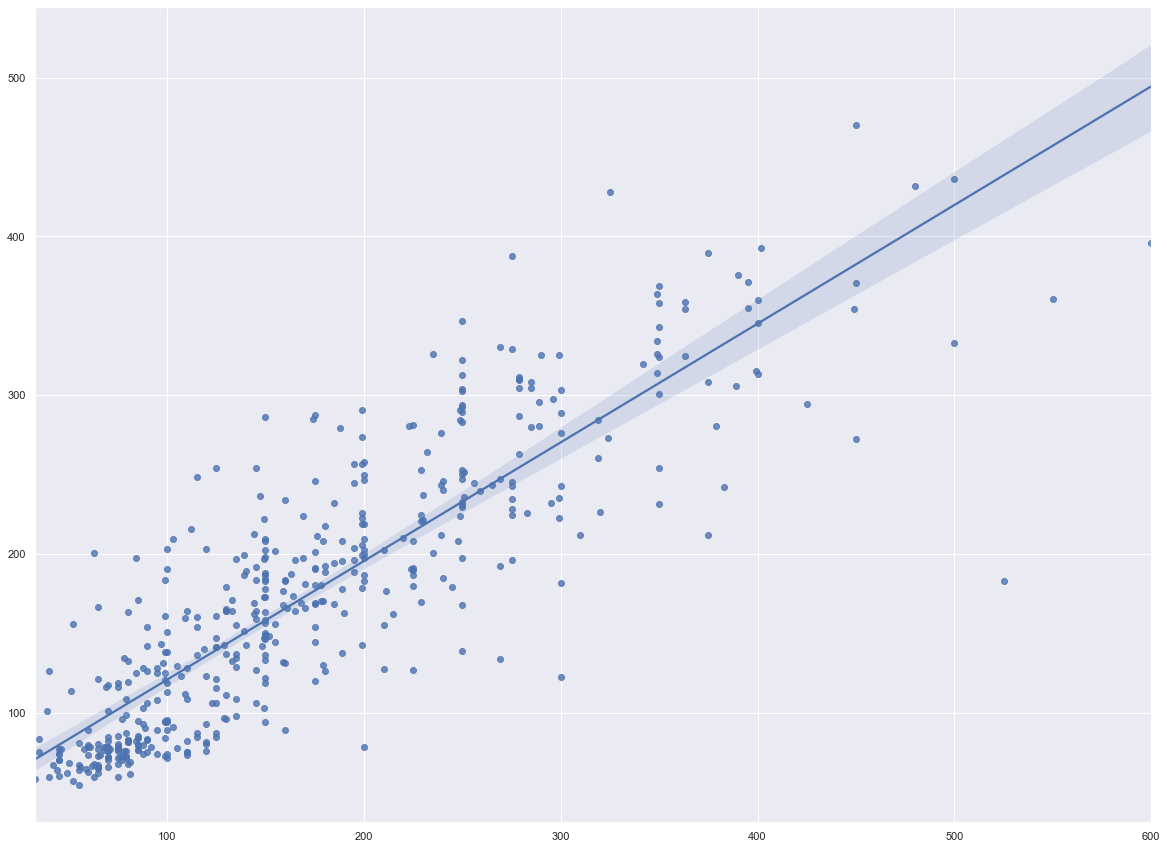

In [643]:
from scipy import stats
print(stats.pearsonr(y_test,y_hat))
sns.color_palette("tab10")
sns.color_palette("rocket", as_cmap=True)
sns.regplot(x=y_test,y=y_hat)